In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
import io
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
filepath2 = r"C:\Users\91623\OneDrive\Desktop\projects\milage\milage.csv"
df= pd.read_csv(filepath2)
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
unique = [feature for feature in df.columns if len(df[feature].unique())>0 and len(df[feature].unique())<100]
for feature in unique:
    print("{} has {} unique values : {} {}".format(feature,len(df[feature].unique()),df[feature].unique(),"\n"))

cylinders has 5 unique values : [8 4 6 3 5] 

displacement has 82 unique values : [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171.  115.  101.  305.   85.  130.  168.
 111.  260.  151.  146.   80.   78.  105.  131.  163.   89.  267.   86.
 183.  141.  173.  135.   81.  100.  145.  112.  181.  144. ] 

horsepower has 94 unique values : [130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193.  nan 100. 105. 175. 153. 180.
 110.  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92.
 145. 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.
  52.  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152.
 102. 108.  68.  58. 149.  89.  6

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df=df.drop('name',axis=1)

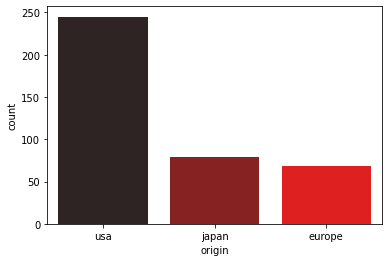

In [10]:
sns.countplot(df['origin'],palette='dark:r');

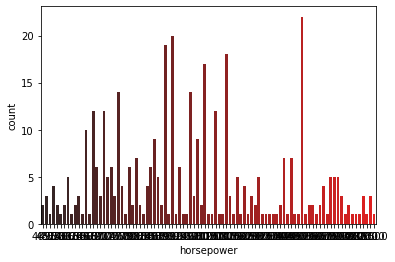

In [11]:
sns.countplot(df['horsepower'],palette='dark:r');

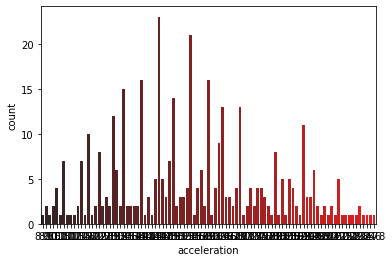

In [12]:
sns.countplot(df['acceleration'],palette='dark:r');

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
list1=['origin']
for i in list1:
    df[i]=le.fit_transform(df[i])

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,2
1,15.0,8,350.0,165.0,3693,11.5,70,2
2,18.0,8,318.0,150.0,3436,11.0,70,2
3,16.0,8,304.0,150.0,3433,12.0,70,2
4,17.0,8,302.0,140.0,3449,10.5,70,2


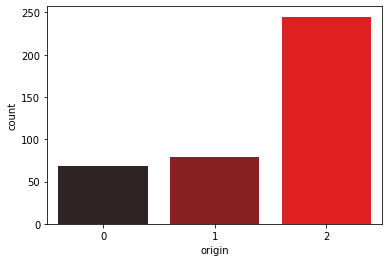

In [15]:
sns.countplot(df['origin'],palette='dark:r');

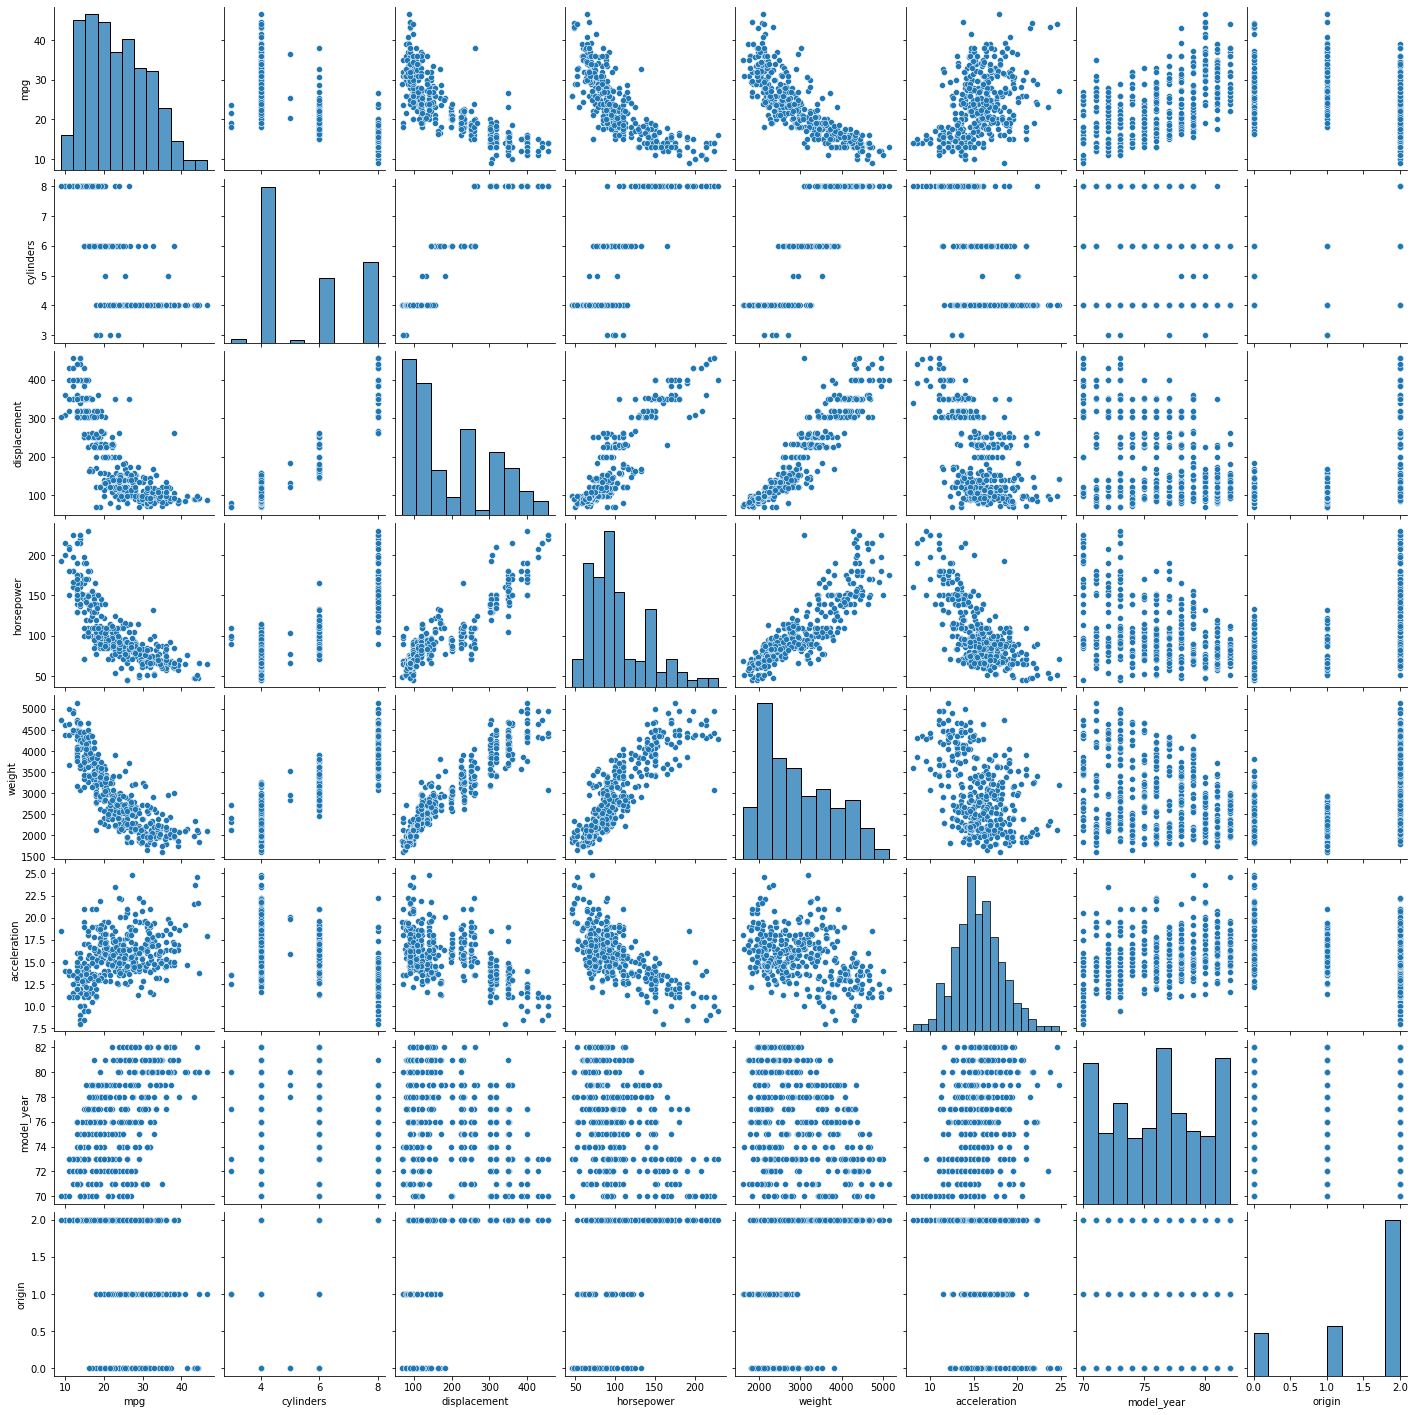

In [28]:
sns.pairplot(df)

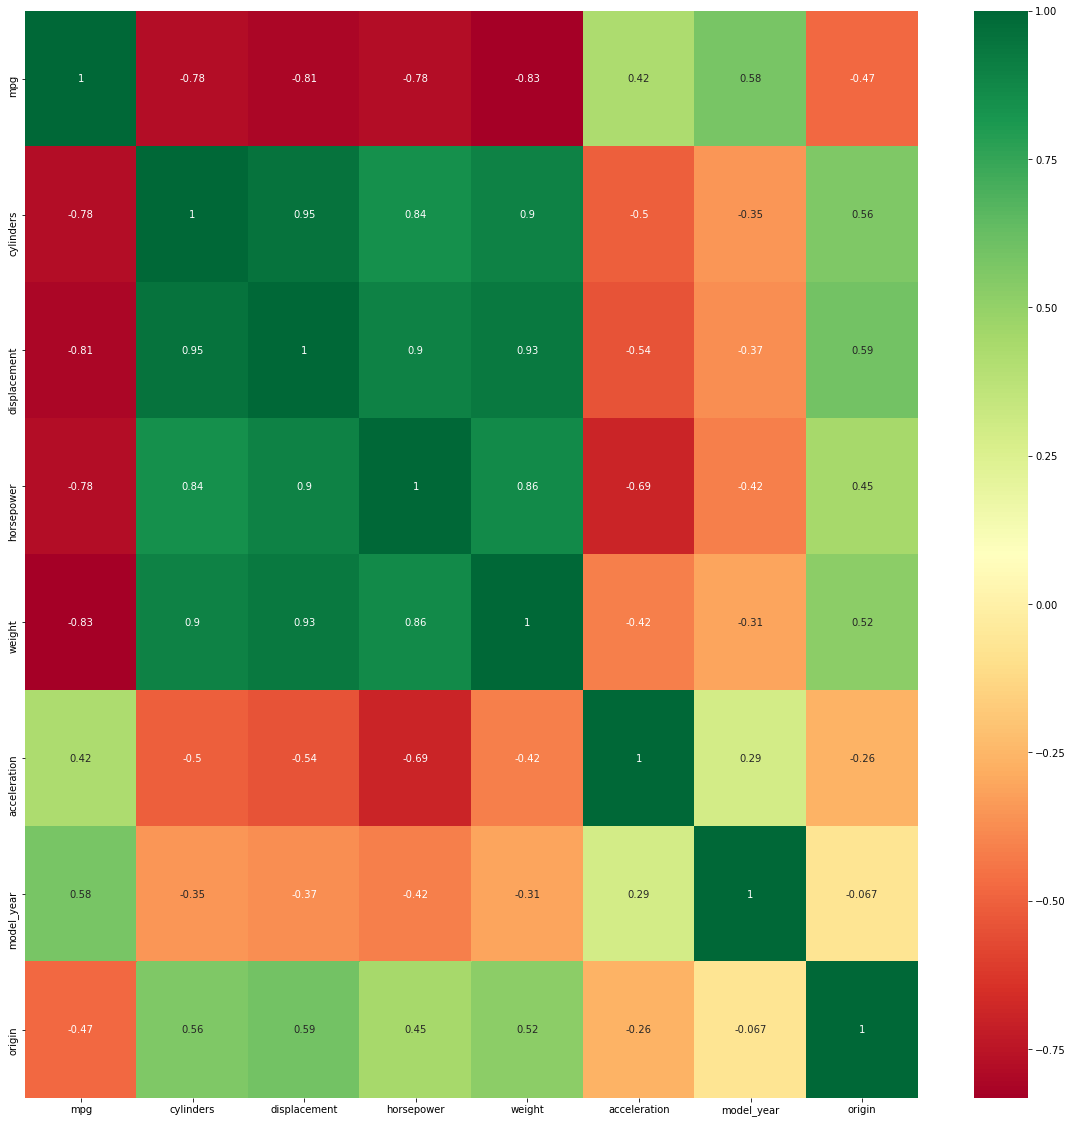

In [29]:
corrmat=df.corr()
top_corr=corrmat.index
plt.figure(figsize=(20,20))
g= sns.heatmap(df[top_corr].corr(),annot= True,cmap="RdYlGn")

In [16]:
x=df.drop(['mpg'],axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [18]:
x=StandardScaler().fit(x).transform(x)
x

array([[ 1.48394702,  1.07728956,  0.66413273, ..., -1.285258  ,
        -1.62531533,  0.71128521],
       [ 1.48394702,  1.48873169,  1.57459447, ..., -1.46672362,
        -1.62531533,  0.71128521],
       [ 1.48394702,  1.1825422 ,  1.18439658, ..., -1.64818924,
        -1.62531533,  0.71128521],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, ..., -1.4304305 ,
         1.63640964,  0.71128521],
       [-0.86401356, -0.7120053 , -0.66254009, ...,  1.11008813,
         1.63640964,  0.71128521],
       [-0.86401356, -0.72157372, -0.58450051, ...,  1.40043312,
         1.63640964,  0.71128521]])

In [19]:
y=df['mpg']


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((313, 7), (79, 7), (313,), (79,))

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score ,accuracy_score  
lin_reg=r2_score (y_test,y_pred)*100
lin_reg

77.09775496313566

In [23]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x_train,y_train)
la_pred=la.predict(x_test)
la_score=r2_score(y_test,la_pred)*100
print("Accuracy score for LR :",la_score)

Accuracy score for LR : 78.26644688352089


In [24]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr.fit(x_train,y_train)
rr_pred=rr.predict(x_test)
from sklearn.metrics import r2_score
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

Accuracy score for RidgeR : 77.31133461881808


In [25]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)
svr_score=r2_score(y_test,svr_pred)*100
print("Accuracy score for LR :",svr_score)

Accuracy score for LR : 82.79062399903165


In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for LR :",rfr_score)

Accuracy score for LR : 84.00629193834952


In [27]:
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','Lasso Reg','RandomForest Reg','Support Vector Reg'],
            "Accuracy socre":[lin_reg,rr_score,la_score,rfr_score,svr_score]})

,Model Names,Accuracy socre
0,Linear Reg,77.097755
1,Ridge Reg,77.311335
2,Lasso Reg,78.266447
3,RandomForest Reg,84.006292
4,Support Vector Reg,82.790624


<AxesSubplot:xlabel='displacement', ylabel='mpg'>

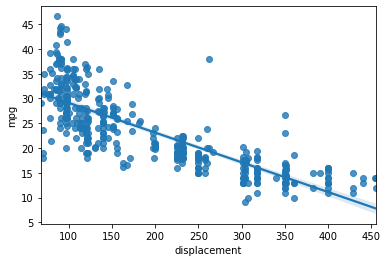

In [30]:
sns.regplot(x = 'displacement', y = 'mpg' ,data= df)